In [1]:
install.packages(c("glmtoolbox", "aod", "nnet", "reader"))
library(glmtoolbox)
library(aod)
library(nnet)
library(reader)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zigg’, ‘RcppParallel’, ‘RcppArmadillo’, ‘numDeriv’, ‘Rfast’, ‘Formula’, ‘statmod’, ‘SuppDists’, ‘NCmisc’


Loading required package: NCmisc


Attaching package: ‘reader’


The following objects are masked from ‘package:NCmisc’:

    cat.path, get.ext, rmv.ext




In [2]:
data = read.csv("/content/Turnover.csv")
head(data)

,ID,Turnover,JS,OC,TI,NAff
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,EMP559,1,4.96,5.32,0.51,1.87
2,EMP561,1,1.72,1.47,4.08,2.48
3,EMP571,1,1.64,0.87,2.65,2.84
4,EMP589,1,3.01,2.15,4.17,2.43
5,EMP592,1,3.04,1.94,3.27,2.76
6,EMP601,1,3.81,3.81,3.01,3.67


### Installing **ROCR** package for **ROC-curve**

In [3]:
install.packages("ROCR")
library(ROCR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




## Simple Logistic Regression

In [4]:
model = glm(Turnover ~ JS, data = data, family = 'binomial')
model


Call:  glm(formula = Turnover ~ JS, family = "binomial", data = data)

Coefficients:
(Intercept)           JS  
     1.8554      -0.4378  

Degrees of Freedom: 97 Total (i.e. Null);  96 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    131.7 
Residual Deviance: 126.3 	AIC: 130.3

Predicting probabilities

In [5]:
predicted_probabilities = predict(model, type = 'response')
predicted_probabilities

1         2         3         4         5         6         7         8 
0.4216566 0.7507079 0.7572043 0.6312704 0.6282082 0.5467274 0.7775131 0.5347693 
        9        10        11        12        13        14        15        16 
0.6956350 0.7531576 0.5672481 0.7507079 0.7305327 0.5107466 0.7244579 0.5315005 
       17        18        19        20        21        22        23        24 
0.6853444 0.5960009 0.6974856 0.6343220 0.4561403 0.6044044 0.5151213 0.8525403 
       25        26        27        28        29        30        31        32 
0.6383741 0.6593156 0.5096526 0.5938910 0.5140278 0.6363505 0.7465891 0.6168935 
       33        34        35        36        37        38        39        40 
0.4302196 0.6651905 0.6127467 0.6054506 0.6168935 0.7305327 0.4790224 0.5445568 
       41        42        43        44        45        46        47        48 
0.6928473 0.5369469 0.6271852 0.7737037 0.4615753 0.5991591 0.4637519 0.8015000 
       49        50        51        53        54        55        56        57 
0.7407478 0.5488962 0.6533913 0.4572265 0.5811612 0.5293197 0.5864795 0.5402106 
       58        59        60        61        62        63        64        65 
0.3724484 0.6044044 0.6064959 0.6796529 0.7339658 0.4550545 0.4976152 0.6700476 
       66        67        68        69        70        71        72        73 
0.7915689 0.6671376 0.7020839 0.3162077 0.3673468 0.6085835 0.7200672 0.3673468 
       74        75        76        77        78        79        80        81 
0.6758284 0.6748686 0.5800953 0.4757459 0.6096258 0.6312704 0.4131404 0.6393841 
       82        83        84        85        86        87        88        89 
0.5970546 0.4812078 0.4539692 0.7474165 0.5661732 0.5886012 0.8266469 0.5184009 
       90        91        92        93        94        95        96        97 
0.7270717 0.6106671 0.5981073 0.5854174 0.5227711 0.6834533 0.6504111 0.3562288 
       98        99 
0.5597108 0.5194937

## Plotting **ROC** curve

In [6]:
install.packages(c("epiDisplay", "foreign", "survival", "MASS", "nnet"))
library(epiDisplay)
library(foreign)
library(survival)
library(MASS)
library(nnet)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: foreign

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:aod’:

    rats


Loading required package: MASS



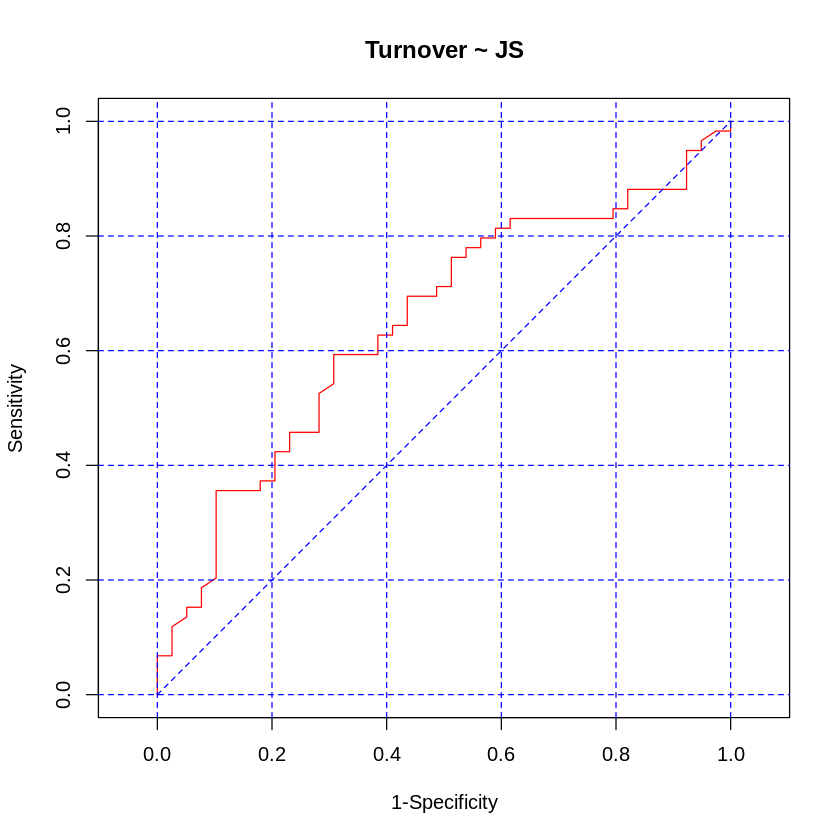

In [7]:
roc_curve = lroc(model, title = TRUE)

In [8]:
roc_curve$auc

[1] 0.6475445

## Simple logistic regression using **Logit** function

In [9]:
install.packages("lessR")
library(lessR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deldir’, ‘RcppEigen’, ‘png’, ‘jpeg’, ‘interp’, ‘DEoptimR’, ‘latticeExtra’, ‘robustbase’, ‘ellipse’, ‘leaps’, ‘openxlsx’, ‘xts’, ‘zoo’



lessR 4.4.1                         feedback: gerbing@pdx.edu 
--------------------------------------------------------------
> d <- Read("")  Read data file, many formats available, e.g., Excel
  d is default data frame, data= in analysis routines optional

Many examples of reading, writing, and manipulating data, 
graphics, testing means and proportions, regression, factor analysis,
customization, forecasting, and aggregation from pivot tables
  Enter: browseVignettes("lessR")

View lessR updates, now including time series forecasting
  Enter: news(package="lessR")

Interactive data analysis
  Enter: interact()



Attaching package: ‘lessR’


The following object is masked from ‘package:base’:

    sort_by




In [10]:
model2 = Logit(Turnover ~ JS, data = data)
model2


Response Variable:   Turnover
Predictor Variable 1:  JS

Number of cases (rows) of data:  99 
Number of cases retained for analysis:  98 


   BASIC ANALYSIS 

-- Estimated Model of Turnover for the Logit of Reference Group Membership

             Estimate    Std Err  z-value  p-value   Lower 95%   Upper 95%
(Intercept)    1.8554     0.6883    2.695    0.007      0.5063      3.2044 
         JS   -0.4378     0.1958   -2.236    0.025     -0.8216     -0.0540 


-- Odds Ratios and Confidence Intervals

             Odds Ratio   Lower 95%   Upper 95%
(Intercept)      6.3939      1.6591     24.6415 
         JS      0.6455      0.4397      0.9475 


-- Model Fit

    Null deviance: 131.746 on 97 degrees of freedom
Residual deviance: 126.341 on 96 degrees of freedom

AIC: 130.3413 

Number of iterations to convergence: 4 


   ANALYSIS OF RESIDUALS AND INFLUENCE 
Data, Fitted, Residual, Studentized Residual, Dffits, Cook's Distance
   [sorted by Cook's Distance]
   [res_rows = 20 out of 98


Call:  glm(formula = my_formula, family = "binomial", data = data)

Coefficients:
(Intercept)           JS  
     1.8554      -0.4378  

Degrees of Freedom: 97 Total (i.e. Null);  96 Residual
Null Deviance:	    131.7 
Residual Deviance: 126.3 	AIC: 130.3

For 1 unit increase in `JS`, the log odd decreases by 0.438 times. So we can say that the people who have higher job satisfaction have less tendency to quit.


- Odd ratio > 1 == +ve association
- Odd ratio < 1 == -ve association
- Odd ratio = 1 ==  no association

------

We an also say that, for `1 unit` increase in `JS`, the odds of quitting the job decreases by 0.6455 times.

**`OR`**

1- 0.6455 = 0.354 = **35.4%**

- The chances of quitting decreases by 35.4%.




## Cooks Distance

To check if they are free from outliers we use `cooks distance`.
- Any value greater than 0.04 will be considered as an `outlier`.

# **Multiple Logistic Regression**

In [13]:
model3 = Logit(Turnover ~ JS + TI + NAff, data = data)
model3


Response Variable:   Turnover
Predictor Variable 1:  JS
Predictor Variable 2:  TI
Predictor Variable 3:  NAff

Number of cases (rows) of data:  99 
Number of cases retained for analysis:  95 


   BASIC ANALYSIS 

-- Estimated Model of Turnover for the Logit of Reference Group Membership

             Estimate    Std Err  z-value  p-value   Lower 95%   Upper 95%
(Intercept)   -3.9286     1.8120   -2.168    0.030     -7.4800     -0.3772 
         JS   -0.2332     0.2215   -1.053    0.293     -0.6674      0.2010 
         TI    0.8967     0.3166    2.832    0.005      0.2761      1.5172 
       NAff    1.1952     0.4996    2.392    0.017      0.2160      2.1743 


-- Odds Ratios and Confidence Intervals

             Odds Ratio   Lower 95%   Upper 95%
(Intercept)      0.0197      0.0006      0.6858 
         JS      0.7920      0.5130      1.2227 
         TI      2.4514      1.3180      4.5593 
       NAff      3.3041      1.2411      8.7963 


-- Model Fit

    Null deviance: 127.017 


Call:  glm(formula = my_formula, family = "binomial", data = data)

Coefficients:
(Intercept)           JS           TI         NAff  
    -3.9286      -0.2332       0.8967       1.1952  

Degrees of Freedom: 94 Total (i.e. Null);  91 Residual
Null Deviance:	    127 
Residual Deviance: 105.2 	AIC: 113.2

For `1 unit` increase in `NAff`, when controlling for other variable predictor in the model, odds of quitting increases 3.3041 times.

Also we can see that the AIC and all consisting deviance values have decreased and the performance matrices have increased which is a good indicator.

--------------
--------------

# **Forward Selection**

Forwatd selection is a type of stepwise regression which begins with an empty model and ass in variables one by one.
- In each forward step, one variable that gives the single best improvement to the model is added.

1. Null model: Start a model with no variables
2. Model with 1 variable: Add the most significant variable.
3. Keep adding the most significant variable until reaching the stopping rule or running out of variables.

## **Criteria for selction**
**How to determine the most significant variable at each step?**
- It has the smallest `p-value`.
-  It provides the highest increase in `R-squared`.
- It provides the highest drop in mdoel's `RSS`.

**How to choose a stopping rule?**
- The stopping rule is satisfied when all remaining variables to consider have a `p-value` larger than some specified threshold, if added to the model.

The threshold can be:
- Fixed value (0.02, 0.05 or 0.10)
- Determined by `AIC` or `BIC`

# **Backward Selection**
1. Full model: Saturated Model
2. remove the least significant variable.

